In [ ]:
# Import required libraries
from diffusers import StableDiffusionPipeline
from huggingface_hub import login
import torch

## Download the model

In [3]:
# ----------------------------------------------------------
# Step 1: Authenticate with Hugging Face
# ----------------------------------------------------------
#   1. Create an account at https://huggingface.co/
#   2. Generate a Personal Access Token (PAT) from: Settings → Access Tokens
#   3. Use that token to log in and enable model downloads.
login(token="PasteYourTokerHere")  

float 32

In [1]:
# ----------------------------------------------------------
# Step 2: Select and download a Stable Diffusion model
# ----------------------------------------------------------

# Choose a local directory where the downloaded model files
local_dir = "./stable-diffusion-v1-5-fp32"

# Load the Stable Diffusion v1.5 model from Hugging Face Hub
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32,   # (float16 is not supported on CPU).
    use_auth_token=True          # Uses your Hugging Face token automatically
)

# Optional: speed / VRAM optimizations
# pipe.enable_attention_slicing()                       # Splits attention computation into smaller chunks.
# pipe.enable_xformers_memory_efficient_attention()     #   Requires the xformers library and a GPU.

# ----------------------------------------------------------
# Step 3: Save the downloaded model locally
# ----------------------------------------------------------
pipe.save_pretrained(local_dir)

print(f"Model saved locally at: {local_dir}")

# ----------------------------------------------------------
# Step 4: Move the model to the desired device (CPU or GPU)
# ----------------------------------------------------------
# In this example I explicitly use the CPU.
device = "cpu"
pipe = pipe.to(device)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model saved locally at: ./stable-diffusion-v1-5-fp32


In [2]:
# ----------------------------------------------------------
# Step 5: Define your text prompt
# ----------------------------------------------------------

# This text prompt describes the image you want the model to generate.
prompt = "A fluffy ginger cat with bright green eyes, sitting gracefully on a sunlit windowsill, photorealistic, detailed fur texture, soft natural lighting, shallow depth of field, ultra-realistic, cinematic composition, highly detailed"
# The pipeline call performs the full diffusion process and returns a list of PIL images.
image = pipe(prompt, height=512, width=512).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

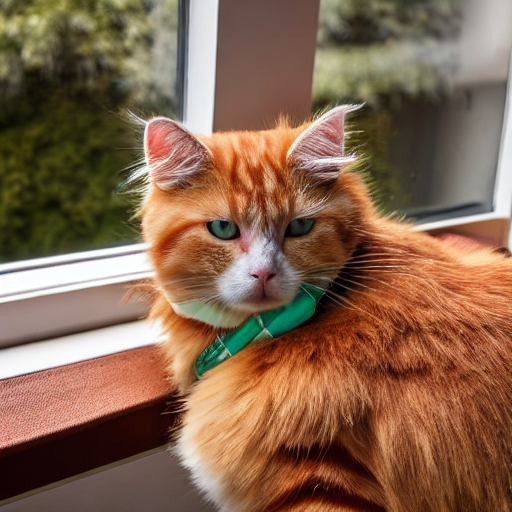

In [3]:
# ----------------------------------------------------------
# Step 7: Display the final image
# ----------------------------------------------------------
# In a Jupyter Notebook, simply writing the variable name `image` will automatically display the image object
image

## Load the model from local directory

In [3]:
from diffusers import StableDiffusionPipeline
import torch

# /specify the path of the model folder
local_dir = "model/stable-diffusion-v1-5-fp32"   # ← remove the "./" prefix

# Load the model from local files
pipe = StableDiffusionPipeline.from_pretrained(
    local_dir,
    torch_dtype=torch.float32,
    local_files_only=True   # ← this forces local loading
)

# Move the model to CPU (or GPU if available)
pipe = pipe.to("cpu")

print("Model loaded successfully from local directory.")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully from local directory.


  0%|          | 0/50 [00:00<?, ?it/s]

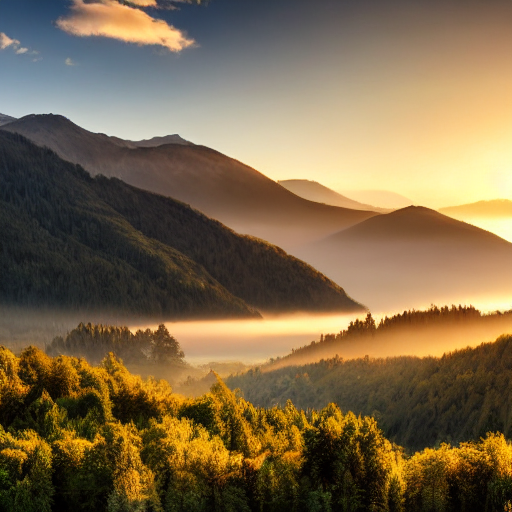

In [5]:
# ----------------------------------------------------------
# Use the locally loaded model to generate an image
# ----------------------------------------------------------

# Define your text prompt
prompt = (
    "A serene mountain landscape at sunrise, soft golden light, "
    "mist over the valley, ultra-realistic, 4k detail"
)

# Run the pipeline to generate an image.
# You can adjust height/width as needed.
# To generate multiple images, you can add: num_images_per_prompt=3
result = pipe(
    prompt,
    height=512,
    width=512,
    num_images_per_prompt=1  # To generate multiple images
)

# Extract the first generated image
image = result.images[0]

# Display in notebook
image

In [9]:
# ----------------------------------------------------------
# Step 8: Save the generated image
# ----------------------------------------------------------

# Choose a filename and format (PNG or JPG)
output_path = "outputs/generated_image.png"
# Save the PIL image object to disk
image.save(output_path)

print(f"Image saved successfully at: {output_path}")

Image saved successfully at: outputs/generated_image.png
